In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clean-wheat-seeds-dataset/seeds_dataset (2).csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data=pd.read_csv("/kaggle/input/clean-wheat-seeds-dataset/seeds_dataset (2).csv")

In [4]:
data.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)",Unnamed: 8,Unnamed: 9
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,NaN,NaN
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,NaN,NaN
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,NaN,NaN
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,NaN,NaN
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,NaN,NaN


**EDA**

In [5]:
data.info()
data.describe()
data.shape
data.size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class (1, 2, 3)          210 non-null    int64  
 8   Unnamed: 8               2 non-null      object 
 9   Unnamed: 9               1 non-null      object 
dtypes: float64(7), int64(1), object(2)
memory usage: 16.5+ KB


2100

In [6]:
data.dtypes

Area                       float64
Perimeter                  float64
Compactness                float64
Length of kernel           float64
Width of kernel            float64
Asymmetry coefficient      float64
Length of kernel groove    float64
Class (1, 2, 3)              int64
Unnamed: 8                  object
Unnamed: 9                  object
dtype: object

In [7]:
data.shape

(210, 10)

In [8]:
data.isnull().sum()

Area                         0
Perimeter                    0
Compactness                  0
Length of kernel             0
Width of kernel              0
Asymmetry coefficient        0
Length of kernel groove      0
Class (1, 2, 3)              0
Unnamed: 8                 208
Unnamed: 9                 209
dtype: int64

In [9]:
data.nunique()

Area                       193
Perimeter                  170
Compactness                186
Length of kernel           188
Width of kernel            184
Asymmetry coefficient      207
Length of kernel groove    148
Class (1, 2, 3)              3
Unnamed: 8                   1
Unnamed: 9                   1
dtype: int64

In [10]:
data=data.drop(columns=["Unnamed: 8", "Unnamed: 9"])
data.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [11]:
X = data[[
    'Area',
    'Perimeter',
    'Compactness',
    'Length of kernel',
    'Width of kernel',
    'Asymmetry coefficient',
    'Length of kernel groove'
]]
y=data['Class (1, 2, 3)']

In [12]:
X.value_counts()
y.value_counts()

Class (1, 2, 3)
1    70
2    70
3    70
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    random_state=42
)

dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [15]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9523809523809523

In [16]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        13
           3       1.00      1.00      1.00        15

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.95      0.95      0.95        42



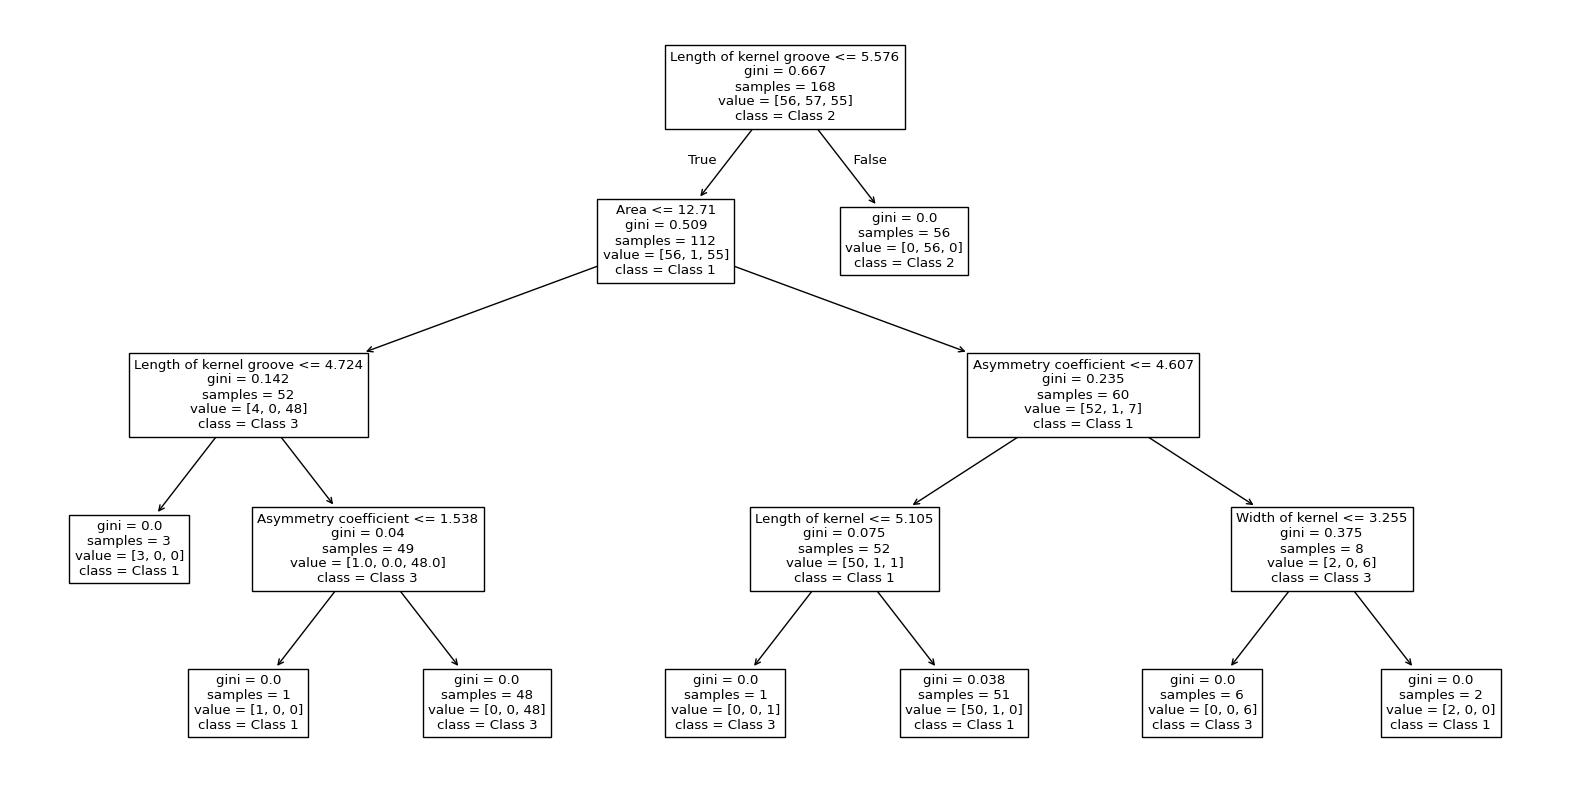

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["Class 1", "Class 2", "Class 3"],
)
plt.show()
